# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt
!pip install ipywidgets


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be foun

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
!pip install ipywidgets

!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter nbextension install --py widgetsnbextension --sys-prefiximport torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
/bin/bash: jupyter: command not found
/bin/bash: jupyter: command not found


/Users/nadiajelani/Desktop/PYTHON/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/nadiajelani/Desktop/PYTHON/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 6): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: /Users/nadiajelani/Desktop/PYTHON/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in: /Users/nadiajelani/Desktop/PYTHON/anaconda3/lib/python3.11/site-packages/torch/lib/libc10.dylib
 in /Users/nadiajelani/Desktop/PYTHON/anaconda3/lib/python3.11/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and create the training dataset
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)

# Download and create the test dataset
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Define the DataLoader for the training dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Define the DataLoader for the test dataset
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Example: Iterate through the DataLoader for training dataset
print("Training Dataset:")
for batch_idx, (data, target) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1} - data shape: {data.shape}, target shape: {target.shape}")
    # Break after first batch for demonstration purposes
    break

# Example: Iterate through the DataLoader for test dataset
print("\nTest Dataset:")
for batch_idx, (data, target) in enumerate(test_loader):
    print(f"Batch {batch_idx + 1} - data shape: {data.shape}, target shape: {target.shape}")
    # Break after the first batch for demonstration purposes
    break

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Training Dataset:
Batch 1 - data shape: torch.Size([64, 1, 28, 28]), target shape: torch.Size([64])

Test Dataset:
Batch 1 - data shape: torch.Size([1000, 1, 28, 28]), target shape: torch.Size([1000])


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?
I chose the specific preprocessing steps for the MNIST dataset to ensure that the data is in the right format and scale for the neural network to learn effectively. The first step, transforms.ToTensor(), converts the images from their original format (PIL Image) to tensors, which are the format that PyTorch can work with. This conversion is necessary because the neural network in PyTorch expects input data to be in tensor form.

The second step, transforms.Normalize((0.1307,), (0.3081,)), adjusts the pixel values of the images to have a mean of 0.1307 and a standard deviation of 0.3081. These values are the average values for the MNIST dataset. Normalizing the images helps the neural network learn better and faster because it ensures that all pixel values are on a similar scale. This makes the training process more stable and efficient, leading to better performance.

Overall, these preprocessing steps are important because they prepare the images in a way that makes it easier for the neural network to learn and make accurate predictions. Without these steps, the model might learn more slowly or perform poorly.







**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


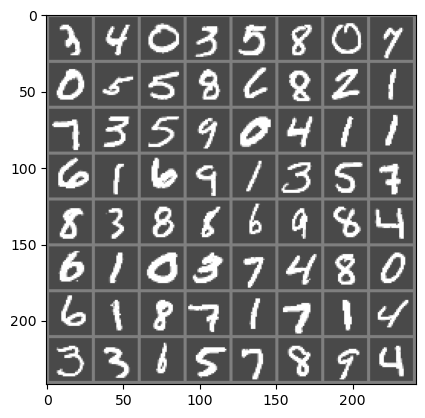

    3     4     0     3     5     8     0     7
Training data shape: torch.Size([60000, 28, 28])
Training labels shape: torch.Size([60000])
Data type: torch.uint8
Label type: torch.int64


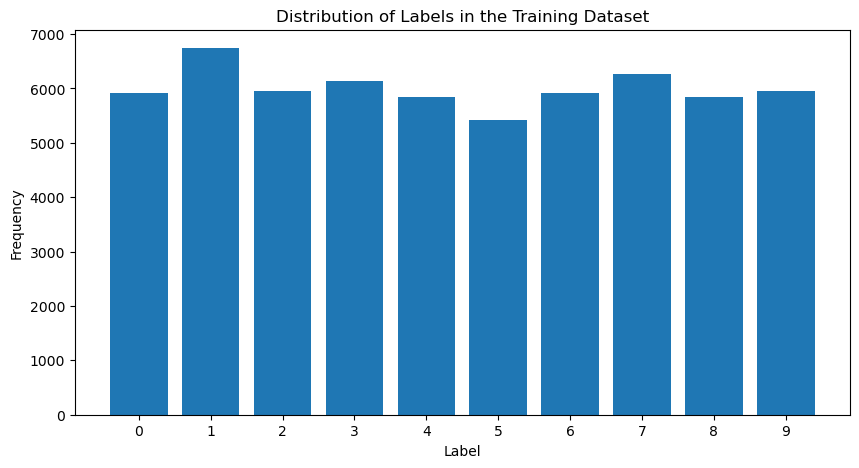

In [7]:
# Explore data
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Specify your transforms as a list
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalization for MNIST dataset
])

# Create the training set and define the training DataLoader
train_dataset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Create the test set and define the test DataLoader
test_dataset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Function to show an image
def show_image(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Function to explore the data
def explore_data(loader):
    # Get a batch of training data
    dataiter = iter(loader)
    images, labels = dataiter.__next__()

    # Show images
    show_image(torchvision.utils.make_grid(images))

    # Print labels
    print(' '.join('%5s' % labels[j].item() for j in range(8)))

# Explore the training data
explore_data(train_loader)

# Display dataset statistics
print(f'Training data shape: {train_dataset.data.shape}')
print(f'Training labels shape: {train_dataset.targets.shape}')
print(f'Data type: {train_dataset.data.dtype}')
print(f'Label type: {train_dataset.targets.dtype}')

# Visualize the distribution of labels in the training dataset
def visualize_label_distribution(dataset):
    plt.figure(figsize=(10, 5))
    plt.hist(dataset.targets.numpy(), bins=range(11), align='left', rwidth=0.8)
    plt.xticks(range(10))
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.title('Distribution of Labels in the Training Dataset')
    plt.show()

visualize_label_distribution(train_dataset)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
## YOUR CODE HERE ##
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = SimpleNN()

# Specify a loss function
loss_fn = nn.NLLLoss()  # Negative Log-Likelihood Loss is suitable for log probabilities

# Specify an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

print(model)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

The loss function used is nn.NLLLoss(), which is suitable for classification tasks where the output is log probabilities from log_softmax.
The Adam optimizer (optim.Adam) is chosen for its adaptive learning rates and efficient performance, which often leads to faster convergence and better results compared to standard gradient descent methods.

In [15]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 5  # Newly added global definition for num_epochs
train_losses = []

def train_model(model, train_loader, optimizer, loss_fn):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_idx % 100 == 0:
                print(f'Train Epoch: {epoch+1} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                      f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
        average_loss = running_loss / len(train_loader)
        train_losses.append(average_loss)
        print(f'Epoch {epoch+1}, Average Loss: {average_loss}')

# Train the model
train_model(model, train_loader, optimizer, loss_fn)

# Function to test the model
def test_model(model, test_loader, loss_fn):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({accuracy:.0f}%)\n')
    return test_loss, accuracy

# Evaluate the model
test_loss, accuracy = test_model(model, test_loader, loss_fn)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.005576
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.001742
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.003078
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.002681
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.003489
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.002791
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.000649
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.003602
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.002800
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.000824
Epoch 1, Average Loss: 0.019115957321211685
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.027369
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.044466
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.002811
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.001370
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.003028
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.040772
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.048753
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.004984
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.041423
Train Epoch: 2 [57

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [16]:
## YOUR CODE HERE ##
test_loss, accuracy = test_model(model, test_loader, loss_fn)



Test set: Average loss: 0.1116, Accuracy: 9769/10000 (98%)



Plot the training loss (and validation loss/accuracy, if recorded).

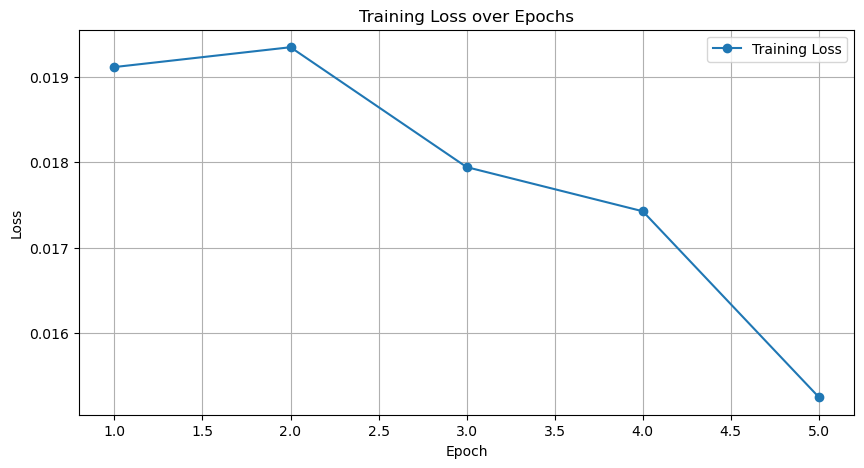

In [17]:
## YOUR CODE HERE ##
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
## YOUR CODE HERE ##
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')

if accuracy < 90:
    print("Accuracy is under 90%, consider making improvements to the model.")
else:
    print("Great work! Accuracy is over 90%.")

Accuracy on the test dataset: 97.69%
Great work! Accuracy is over 90%.


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [19]:
## YOUR CODE HERE ##
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)  # Increased number of neurons
        self.fc2 = nn.Linear(256, 128)    # Increased number of neurons
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = SimpleNN()

# Specify a loss function
loss_fn = nn.NLLLoss()

# Specify an optimizer with a different learning rate
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Print the model architecture
print(model)

# Specify your transforms as a list
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalization for MNIST dataset
])

# Create the training set and define the training DataLoader
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)  # Increased batch size

# Create the test set and define the test DataLoader
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Function to train the model
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Function to test the model
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training and testing the model with updated hyperparameters
num_epochs = 10  # Increased number of epochs
for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320976
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.233564
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.240516
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.302421
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.323366

Test set: Average loss: 0.0002, Accuracy: 9462/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.240746
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.237093
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.204145
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.133526
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.062407

Test set: Average loss: 0.0001, Accuracy: 9648/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.052272
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.145268
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.088399


## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'simple_nn_model.pth')
print("Model saved to simple_nn_model.pth")

Model saved to simple_nn_model.pth
